### Cartpole-v1 test

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

### Angle Reward function

In [2]:
def angleReward(obs, r):
    ang = np.abs(obs[2])
    return np.float32(r + 10*ang)

In [27]:
env = gym.make("CartPole-v1")
obs = env.reset()    
for i in range(1000):
    env.render()
    action = env.action_space.sample() # random action
    obs, reward, done, info = env.step(action)
    reward = angleReward(obs, reward)
#     print(i, action, obs)
    if done:
        break
        obs = env.reset()
# env.close()

0 1 [-0.00861648  0.18302117  0.04585951 -0.28411672]
1 0 [-0.00495606 -0.01272384  0.04017718  0.02267007]
2 0 [-0.00521054 -0.20839825  0.04063058  0.32775374]
3 0 [-0.0093785  -0.40407438  0.04718565  0.6329678 ]
4 1 [-0.01745999 -0.20964135  0.05984501  0.35551031]
5 1 [-0.02165282 -0.01541908  0.06695521  0.08228237]
6 1 [-0.0219612   0.17868237  0.06860086 -0.1885473 ]
7 0 [-0.01838755 -0.01735056  0.06482991  0.12496329]
8 1 [-0.01873456  0.1767856   0.06732918 -0.14658257]
9 1 [-0.01519885  0.370882    0.06439753 -0.41728768]
10 0 [-0.00778121  0.17490936  0.05605178 -0.10501825]
11 0 [-0.00428302 -0.02096919  0.05395141  0.20480873]
12 0 [-0.00470241 -0.2168195   0.05804759  0.51401077]
13 1 [-0.0090388  -0.02256106  0.0683278   0.24017029]
14 1 [-0.00949002  0.17152167  0.07313121 -0.03020173]
15 1 [-0.00605958  0.36552283  0.07252717 -0.29894423]
16 0 [0.00125087 0.16944603 0.06654829 0.01570205]
17 1 [ 0.00463979  0.3635536   0.06686233 -0.25526406]
18 1 [ 0.01191086  0.557

### agent with simple policy

In [ ]:
def simpleAgent(env, policy, maxStep=1000):
    obs = env.reset()
    done = False
    ret = 0
    nStep = 0
    while not done:
        env.render()
        action = policy(obs)
        obs, r, done, info = env.step(action)
        r = angleReward(obs, r) 
        ret += r
        nStep += 1
        if nStep >= maxStep: break
    print (f"# of steps = {nStep}, Score = {ret}")
    return nStep, ret

### Random policy

In [ ]:
def policy_random(obs):
    if np.random.random() < 0.5:
        return 0  # left
    else:
        return 1  # right
    
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_random)
env.close()

### Heuristic policy using angle only

In [ ]:
def policy_angle(obs):
    ang = obs[2]
    if ang < 0:
        return 0  # left
    else:
        return 1  # right
    
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_angle)
env.close()

### Heuristic policy using angle and position

In [ ]:
def policy_angle_pos(obs):
    pos = obs[0]
    ang = obs[2]
    if 10*ang - pos < 0:
        return 0  # left
    else:
        return 1  # right
    
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_angle_pos)
env.close()

### Heuristic policy using angle, position, and velocity

In [ ]:
def policy_angle_pos_vel(obs):
    pos = obs[0]
    vel = obs[1]
    ang = obs[2]
    if 10*ang + pos - vel < 0:
        return 0  # left
    else:
        return 1  # right
    
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_angle_pos_vel)
env.close()

In [ ]:
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_random)
simpleAgent(env, policy_angle)
simpleAgent(env, policy_angle_pos)
simpleAgent(env, policy_angle_pos_vel)
env.close()

In [ ]:
def policy_from_CEM(obs):
    # plain reward
    # w = np.array([-0.00178353, 0.3374739, 0.72456414, 0.45043665]) 
    # angle reward w/ maxStep = 500
    # w = np.array([0.06272953, 0.77593657, 1.61835616, 5.55401569]) 
    # angle reward w/ maxStep = 2000
    w = np.array([0.04187407, 1.66633927, 1.48482396, 4.08942878])
    
    z = np.dot(w, obs)
    if z < 0:
        return 0
    else:
        return 1
    
env = gym.make('CartPole-v1').unwrapped
simpleAgent(env, policy_from_CEM, maxStep=2000)
env.close()

In [28]:
env.close()  # to close video window

In [9]:
class AgentBase:
    def __init__(self, env):
        self.env = env
        self.eps = 0.1
        self.alpha = 0.01
        self.dimState = env.observation_space.shape[0]
        self.nummAction = env.action_space.n
        self.gamma = 0.999

    def getStateRep(self, obs):
        return obs

    def getQs(self, s):
        return self.Q[s]

    def getQa(self, s, a):
        return self.Q[s,a]
    
    def getVs(self, s, done=False):
        if done:
            return 0
        qs = self.getQs(s)
        return np.max(qs)

    def piGreedy(self, state):
        q = self.getQs(state)
        a = q.argmax()
        return a

    def getAction(self, state):  # eps-greedy policy
        # eps-greedy
        if np.random.random() < self.eps:
            a = np.random.choice(self.numAction)
            self.eps *= 0.99
            # print (f"exploration move, eps={self.eps}")
        else:
            a = self.piGreedy(state)
        return a
    
    def saveParam(self):
        pass
    
    def loadParam(self):
        pass

    def runEpisode1(self, maxStep=1000, render=False, stepCB=None, episodeCB=None):
        obs = self.env.reset()
        s = self.getStateRep(obs)
        done = False
        ret = 0
        nStep = 0
        df = 1
        S = [s]
        A = []
        R = []
        while not done:
            if render:
                self.env.render()
            a = self.getAction(s)
            obs, r, done, info = self.env.step(a)
            r = angleReward(obs, r)
            ret += df * r
            df *= self.gamma
            sp = self.getStateRep(obs)
            A.append(a)
            R.append(r)
            S.append(sp)
            if stepCB:
                stepCB(s,a,r,sp,done)
            s = sp
            nStep += 1
            if nStep >= maxStep:  # 500 for v1
                break
        self.nStep = nStep
        if not done:
            ret += df*self.getVs(s)
        if episodeCB:
            episodeCB(S,A,R,done)
        return ret

    def runTrain(self, nEpisode=1000, maxStep=1000, stepCB=None, episodeCB=None):
        retHist = []
        retMax = 0
        for i in range(nEpisode):
            ret = self.runEpisode1(maxStep=maxStep, stepCB=stepCB, episodeCB=episodeCB)
#             print(f"Training episode {i}, return = {ret} in {self.nStep} steps")
            retHist.append(ret)
            if ret > retMax:
                retMax = ret
                self.saveParam()
        
        self.loadParam()
        plt.plot(retHist)
        plt.show()

    def runTest(self, nEpisode=1, maxStep=1000):
        eps = self.eps
        self.eps = 0
        for i in range(nEpisode):
            ret = self.runEpisode1(maxStep=maxStep, render=True)
            print(f"Test episode {i}, return = {ret} in {self.nStep} steps")
        self.eps = eps

In [10]:
class AgentLinVFA1(AgentBase):
    def __init__(self, env):
        super().__init__(env)
        self.w = np.zeros((self.numAction, self.dimState))

    def saveParam(self):
        self.wBest = self.w.copy()
    
    def loadParam(self):
        self.w = self.wBest

    def printParam(self):
        print ("w = ", self.w)

    def getQs(self, s):
        q = np.dot(self.w, s)
        return q

    def getQa(self, s, a):
        q = np.dot(self.w[a], s)
        return q
     
    def update(self, target, s, a):
        qa = self.getQa(s,a)
        delta = (target - qa) * self.alpha
        self.w[a] += delta * s
        
    def stepTD(self, s, a, r, sp, done):
        maxq = self.getVs(sp, done)
        target = r + self.gamma*maxq
        self.update(target)
        
    def stepTD(self, s, a, r, sp, done):
        if done: 
            maxq = 0
        else:
            maxq = self.getVs(sp)
        target = r + self.gamma*maxq
        self.update(target, s, a)

In [11]:
class AgentLinVFA(AgentBase):
    def __init__(self, env):
        super().__init__(env)
        self.w0 = 0.0
        self.ws = np.zeros(self.dimState)
        self.wa = np.zeros(self.dimState)

    def saveParam(self):
        self.wBest = [self.w0, self.ws.copy(), self.wa.copy()]
    
    def loadParam(self):
        [self.w0, self.ws, self.wa] = self.wBest

    def printParam(self):
        print ("w0 = ", self.w0)
        print ("ws = ", self.ws)
        print ("wa = ", self.wa)

    def getQs(self, s):
        qs = self.w0 + np.dot(self.ws, s)
        qa = 0.5*np.dot(self.wa, s)
        return np.array([qs-qa,qs+qa])

    def getQa(self, s, a):
        qs = self.w0 + np.dot(self.ws, s)
        qa = 0.5*np.dot(self.wa, s)
        if a == 0:
            return qs - qa
        else:
            return qs + qa
    
    def update(self, target, s, a):
        qa = self.getQa(s,a)
        delta = (target - qa) * self.alpha
        self.w0 += delta
        self.ws += delta*s
        self.wa += delta*(a-0.5)*s
        
    def stepTD(self, s, a, r, sp, done):
        maxq = self.getVs(sp, done)
        target = r + self.gamma*maxq
        self.update(target, s, a)

    def episodeMC(self, S, A, R, done):
        T = len(R)
        if done:
            G = 0
        else:
            G = self.getVs(S[-1])
        for t in range(T-1, -1, -1):
            G = self.gamma*G + R[t]
            self.update(G, S[t], A[t])
            

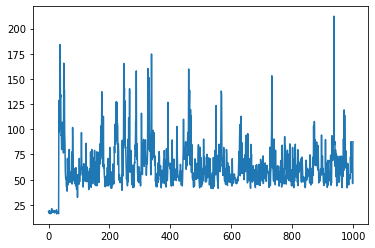

w0 =  137.43492332063465
ws =  [ 9.1110601  -0.53504068 -0.78563435  3.9395677 ]
wa =  [-2.45669053 -9.66559684  0.25893472  6.96656827]
Test episode 0, return = 79.2097179055897 in 42 steps


In [24]:
env = gym.make('CartPole-v1').unwrapped
agent = AgentLinVFA(env)
agent.alpha = 0.01
agent.runTrain(episodeCB=agent.episodeMC, nEpisode=1000)
# agent.runTrain(stepCB=agent.stepTD, nEpisode=1000)
agent.printParam()
agent.runTest()
env.close()

In [21]:
agent.runTest(nEpisode=1)
env.close()

Test episode 0, return = 151.30036394462095 in 105 steps


In [5]:
np.concatenate(([1],[2,3]))

array([1, 2, 3])